<a href="https://colab.research.google.com/github/shreeja2513/Coal_Blasting/blob/main/Coal_Blasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['ABCD.csv']))
print(df)


NameError: ignored

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
dfs = pd.read_csv('/content/drive/MyDrive/ABCD.csv',index_col='From'   ,parse_dates=True)

print('Shape of data',dfs.shape)
dfs.head()


Shape of data (8643, 12)


,#,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
From,,,,,,,,,,,,
2023-02-01 00:00:00,1,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2023-02-01 00:15:00,2,2023-02-01 00:30:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
2023-02-01 00:30:00,3,2023-02-01 00:45:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
2023-02-01 00:45:00,4,2023-02-01 01:00:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
2023-02-01 01:00:00,5,2023-02-01 01:15:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


<Axes: xlabel='From'>

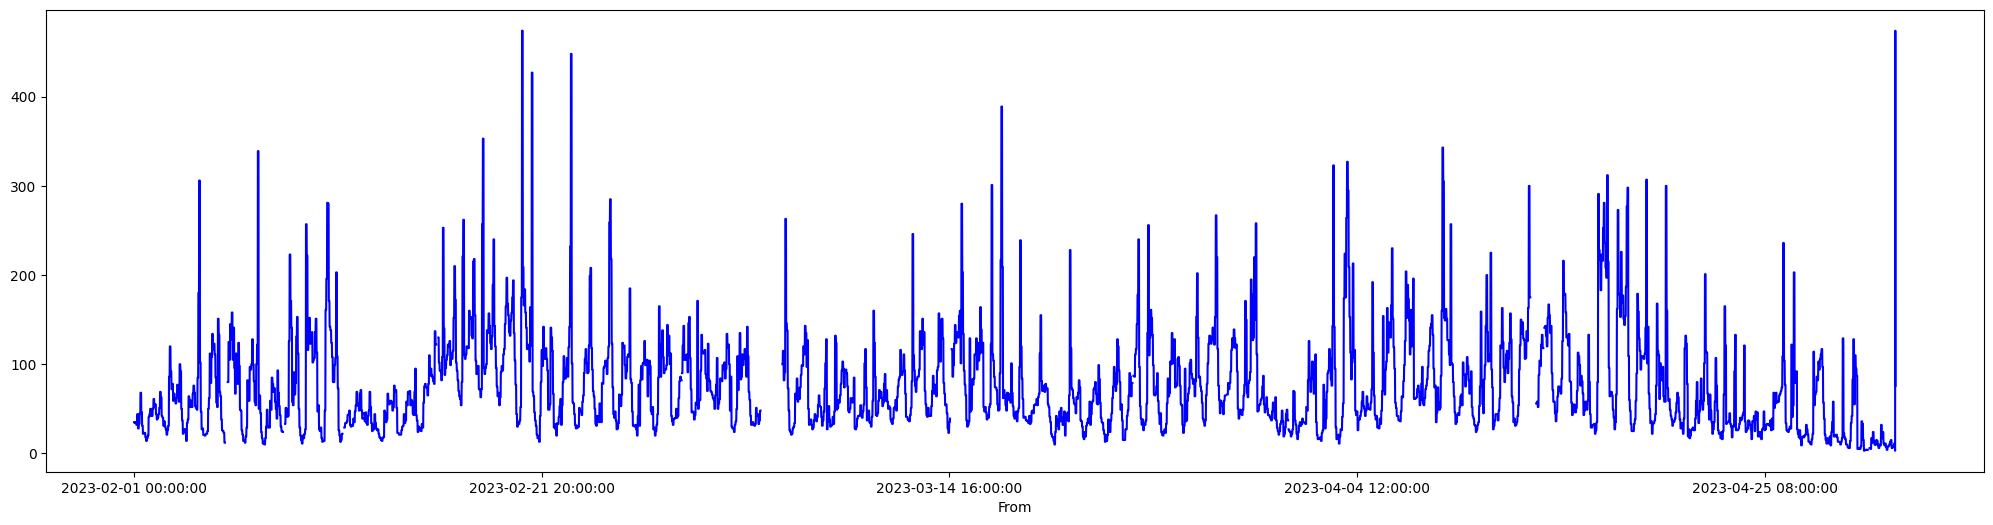

In [ ]:
dfs['PM2.5 (µg/m3)'].plot(figsize=(25,6), color = 'blue')

In [ ]:
dfss=dfs.dropna()

<Axes: xlabel='From'>

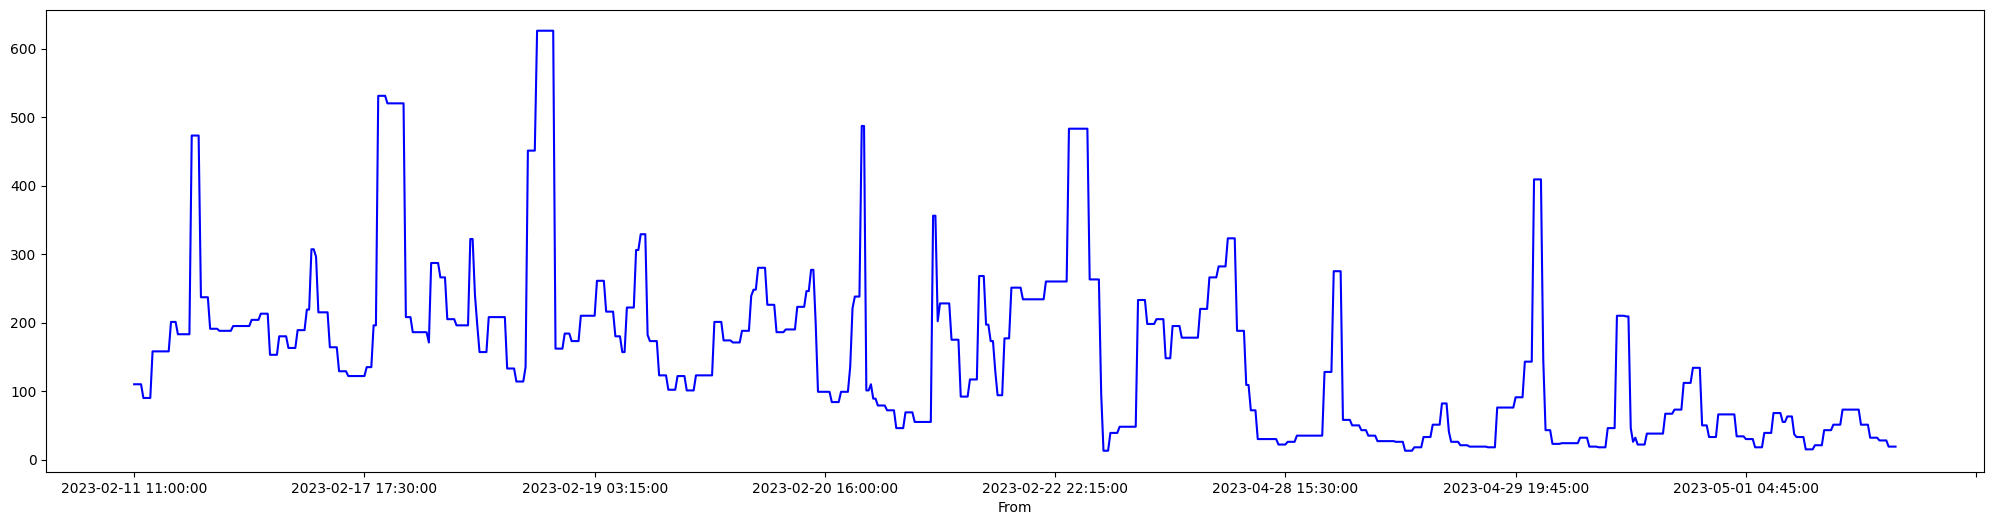

In [ ]:
dfss['PM10 (µg/m3)'].plot(figsize=(25,6),color = 'blue')

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dfsstest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dfsstest[0])
     print("2. P-Value : ", dfsstest[1])
     print("3. Num Of Lags : ", dfsstest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dfsstest[3])
     print("5. Critical Values :")
     for key, val in dfsstest[4].items():
         print("\t",key, ": ", val)
ad_test(dfss['PM2.5 (µg/m3)'])

1. ADF :  -5.472515263800851
2. P-Value :  2.3811819753775867e-06
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 760
5. Critical Values :
	 1% :  -3.4389835846902788
	 5% :  -2.8653504478604757
	 10% :  -2.5687990737534627


In [ ]:

from pmdarima import auto_arima
stepwise_fit = auto_arima(dfss['PM2.5 (µg/m3)'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7154.815, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7228.396, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7222.821, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7223.095, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7226.397, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7224.867, Time=1.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7153.543, Time=1.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7157.117, Time=2.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=7138.442, Time=1.64 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=7136.508, Time=1.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=7192.812, Time=0.53 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=7138.4

In [ ]:
#ignore
print(dfss.shape)
train=dfss.iloc[:-30]
test=dfss.iloc[-30:]
print(train.shape,test.shape)

(766, 12)
(736, 12) (30, 12)


In [ ]:

from statsmodels.tsa.arima.model import ARIMA
print(dfss.shape)
train = dfss.iloc[:-30]
test = dfss.iloc[-30:]
print(train.shape, test.shape)

model = ARIMA(train['PM2.5 (µg/m3)'], order=(1, 1, 4))
model = model.fit()
model.summary()


(766, 12)
(736, 12) (30, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          PM2.5 (µg/m3)   No. Observations:                  736
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -3437.174
Date:                Tue, 27 Jun 2023   AIC                           6886.348
Time:                        08:57:38   BIC                           6913.947
Sample:                             0   HQIC                          6896.992
                                - 736                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6338      0.033     19.022      0.000       0.569       0.699
ma.L1         -0.6239      0.037    -16.867      0.000      -0.696      -0.551
ma.L2         -0.0489      0.042     -1.172      0.241      -0.131       0.033
ma.L3         -0.0327      0.040     -0.812      0.417      -0.111       0.046
ma.L4         -0.2566      0.021    -12.379      0.000      -0.297      -0.216
sigma2       673.6993     13.493     49.929      0.000     647.253     700.145
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             42971.32
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(dfs.shape)
train = dfs.iloc[:-0]
test = dfss.iloc[-800:]
print(train.shape, test.shape)

(8643, 12)
(0, 12) (766, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='From'>

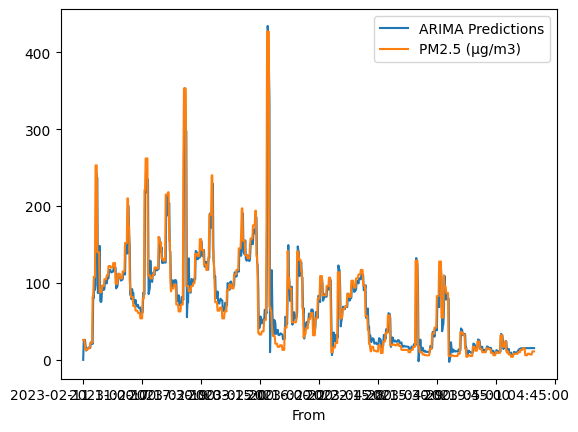

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['PM2.5 (µg/m3)'].plot(legend=True)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'dfs' and the PM2.5 column is 'PM2.5 (µg/m3)'
df = dfs.copy()  # Create a copy of the original DataFrame

# Interpolate missing values in the PM2.5 column using linear interpolation
df['PM2.5 (µg/m3)'] = df['PM2.5 (µg/m3)'].interpolate(method='linear')

# Print the DataFrame with interpolated values
print(df)


                        #   To (Interval: 15M)  PM10 (µg/m3)  PM2.5 (µg/m3)  \
From                                                                          
2023-02-01 00:00:00     1  2023-02-01 00:15:00         95.00          35.00   
2023-02-01 00:15:00     2  2023-02-01 00:30:00         95.00          35.00   
2023-02-01 00:30:00     3  2023-02-01 00:45:00         95.00          35.00   
2023-02-01 00:45:00     4  2023-02-01 01:00:00        122.00          34.00   
2023-02-01 01:00:00     5  2023-02-01 01:15:00        122.00          34.00   
...                   ...                  ...           ...            ...   
2023-05-01 23:30:00  8639  2023-05-01 23:45:00         19.00          11.00   
2023-05-01 23:45:00  8640  2023-05-02 00:00:00         32.00           6.00   
Min                  8641                  NaN         12.00           3.00   
Max                  8642                  NaN        847.00         474.00   
Avg.                 8643                  NaN      

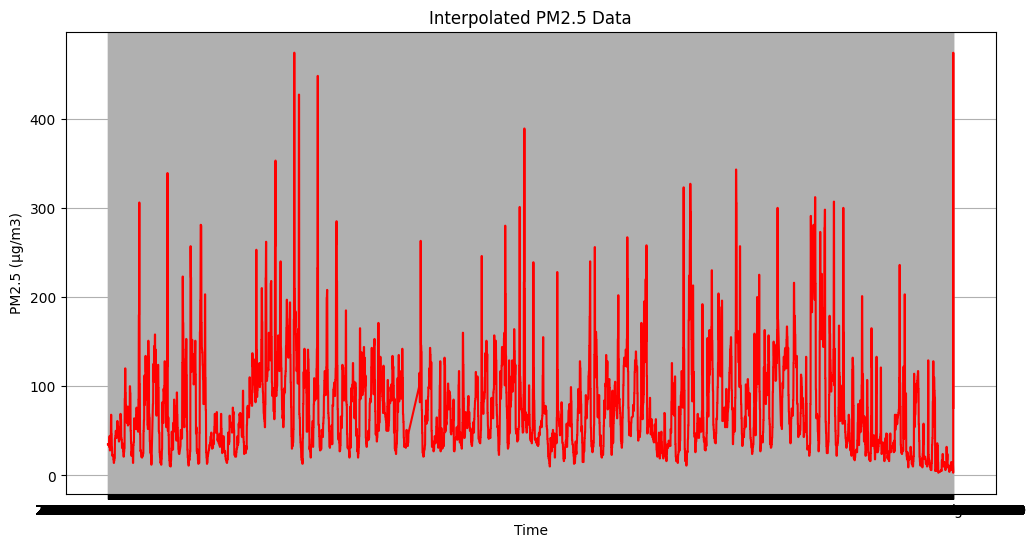

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'dfs' and the PM2.5 column is 'PM2.5 (µg/m3)'
df = dfs.copy()  # Create a copy of the original DataFrame

# Interpolate missing values in the PM2.5 column using linear interpolation
df['PM2.5 (µg/m3)'] = df['PM2.5 (µg/m3)'].interpolate(method='linear')

# Plot the interpolated PM2.5 data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PM2.5 (µg/m3)'], color='red')
plt.title('Interpolated PM2.5 Data')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m3)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

<Figure size 600x500 with 0 Axes>

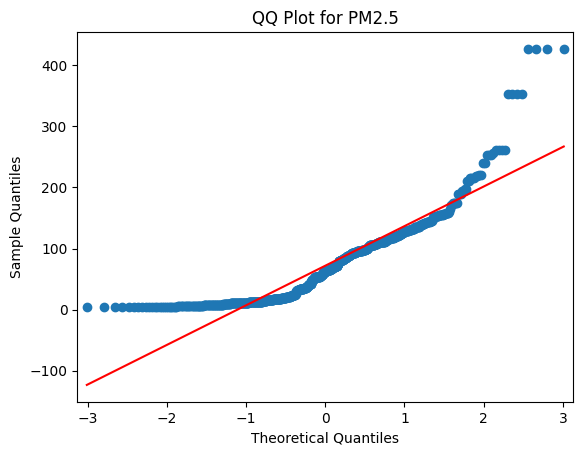

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Assuming your DataFrame is named 'dfs'

# Set the figure size
plt.figure(figsize=(6, 5))

# Plot the QQ plot for 'PM2.5' column
qqplot(dfss['PM2.5 (µg/m3)'], line='s')
plt.title('QQ Plot for PM2.5')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
firstrow = 56
lastrow = 8600
row_gap = 96
numofrows = (lastrow- firstrow) // row_gap + 1
selecrows = [dfs.iloc[firstrow + i * row_gap] for i in range(numofrows)]
df2 = pd.DataFrame(selecrows)
print(df2)


                        #   To (Interval: 15M)  PM10 (µg/m3)  PM2.5 (µg/m3)  \
2023-02-01 14:00:00    57  2023-02-01 14:15:00          73.0           18.0   
2023-02-02 14:00:00   153  2023-02-02 14:15:00         135.0           30.0   
2023-02-03 14:00:00   249  2023-02-03 14:15:00         147.0           24.0   
2023-02-04 14:00:00   345  2023-02-04 14:15:00           NaN            NaN   
2023-02-05 14:00:00   441  2023-02-05 14:15:00         149.0           23.0   
...                   ...                  ...           ...            ...   
2023-04-27 14:00:00  8217  2023-04-27 14:15:00          29.0           13.0   
2023-04-28 14:00:00  8313  2023-04-28 14:15:00          30.0           12.0   
2023-04-29 14:00:00  8409  2023-04-29 14:15:00          21.0            7.0   
2023-04-30 14:00:00  8505  2023-04-30 14:15:00          32.0            4.0   
2023-05-01 14:00:00  8601  2023-05-01 14:15:00          15.0            4.0   

                     NO (µg/m3)  NO2 (µg/m3)  NOX (

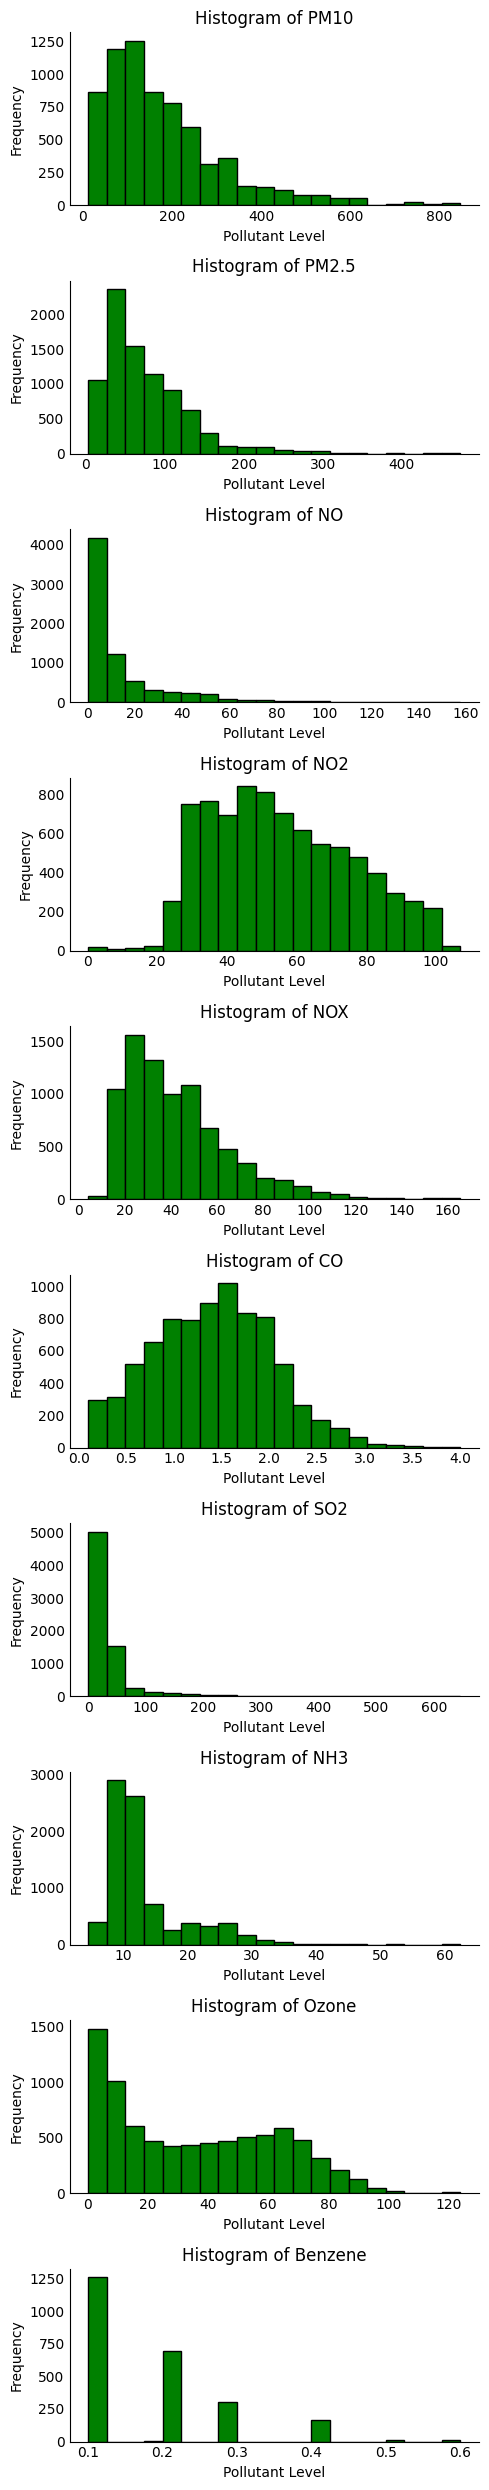

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pollutant_columns = ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']
pollutant_names = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

fig, axs = plt.subplots(len(pollutant_columns), 1, figsize=(5, 25))

for i in range(len(pollutant_columns)):
    ax = axs[i]
    column = pollutant_columns[i]
    pollutant_name = pollutant_names[i]

    ax.hist(dfs[column].dropna(), bins=20, edgecolor='black', color='green')

    ax.set_title(f'Histogram of {pollutant_name}')
    ax.set_xlabel('Pollutant Level')
    ax.set_ylabel('Frequency')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()

plt.show()


<Axes: xlabel='From'>

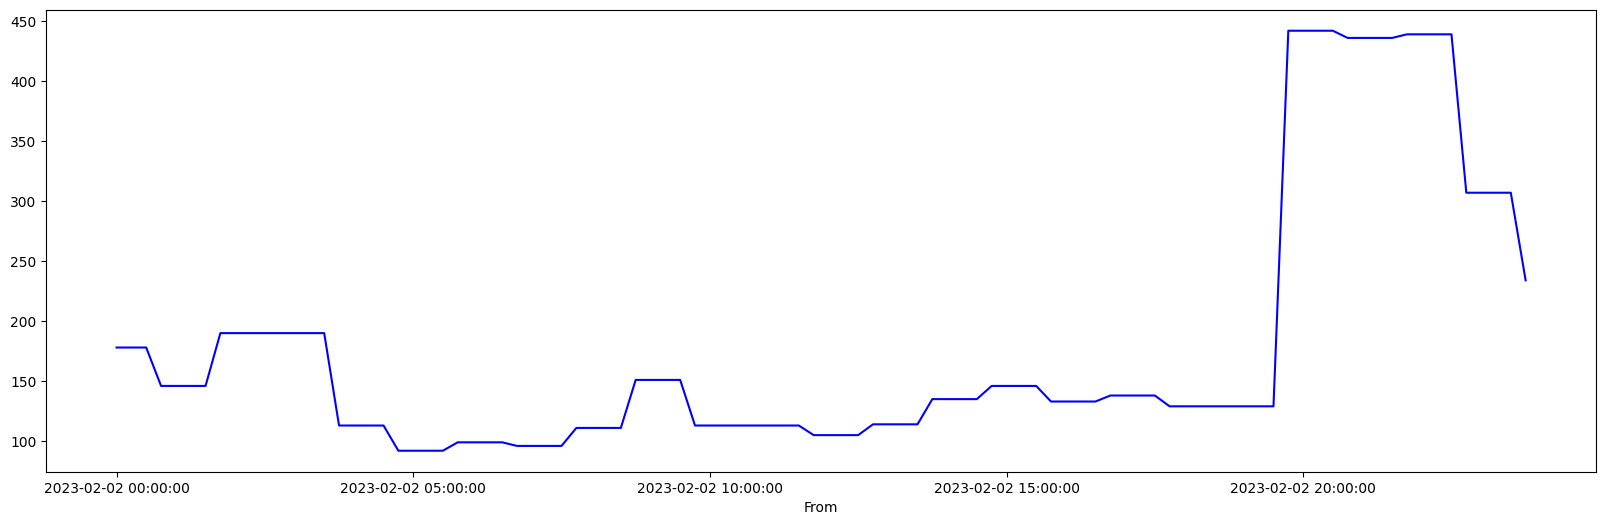

In [ ]:
#To plot the graph of PM10 over 1 day
#Checking the sudden increase at time of blasing
#which is 13:45:00
import pandas as pd

firstrow = 97
lastrow = 192

dfs2 = dfs.iloc[firstrow-1:lastrow]

dfs2['PM10 (µg/m3)'].plot(figsize=(20,6), color = 'blue')